In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the reward distributions for each arm
def reward_distribution(arm):
    if arm == 0:
        return np.random.normal(1, 0.1)
    elif arm == 1:
        return np.random.exponential(1)
    elif arm == 2:
        return np.random.poisson(1)
    elif arm == 3:
        return np.random.normal(2, 0.5)
    elif arm == 4:
        return np.random.exponential(2)

In [3]:
# Implementing epsilon-greedy algorithm
def epsilon_greedy(epsilon, n_arms, n_episodes, n_timesteps):
    rewards = np.zeros(n_episodes)
    Q_values = np.zeros(n_arms)
    N = np.zeros(n_arms)

    for episode in range(n_episodes):
        total_reward = 0
        for t in range(n_timesteps):
            if np.random.rand() < epsilon:
                action = np.random.randint(n_arms)
            else:
                action = np.argmax(Q_values)

            reward = reward_distribution(action)
            total_reward += reward
            N[action] += 1
            Q_values[action] += (reward - Q_values[action]) / N[action]
        
        rewards[episode] = total_reward

    return rewards

In [4]:
# Simulation parameters
n_arms = 5
n_episodes = 1000
n_timesteps = 100

# Run simulations for different epsilon values
epsilons = [0.1, 0.01, 0]
rewards_all = {}

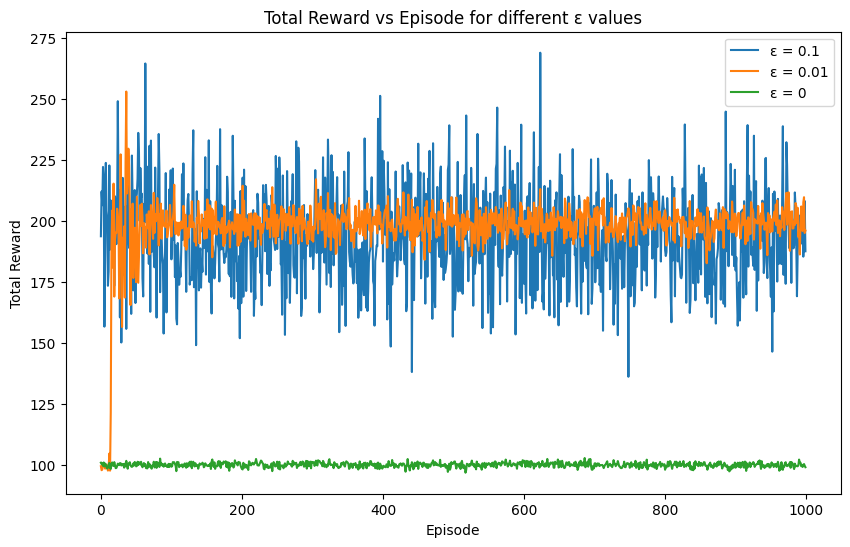

In [5]:
for epsilon in epsilons:
    rewards_all[epsilon] = epsilon_greedy(epsilon, n_arms, n_episodes, n_timesteps)

# Plotting the results
plt.figure(figsize=(10, 6))
for epsilon in epsilons:
    plt.plot(rewards_all[epsilon], label=f'ε = {epsilon}')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward vs Episode for different ε values')
plt.legend()
plt.show()